In [1]:
from captcha_model import *
from captcha_generator import random_captcha_text
from captcha_solver import load_image, load_labeled_data, predict, validate, solve_ctc

In [2]:
device

device(type='cuda')

In [3]:
characters, width, height, n_len, n_classes

('-0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ',
 192,
 64,
 4,
 63)

In [4]:
image, target, input_length, label_length = dataset[0]

In [5]:
''.join([characters[x] for x in target]), input_length, label_length

('rilt', tensor([12]), tensor([4]))

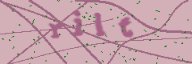

In [6]:
to_pil_image(image)

In [7]:
image.shape

torch.Size([3, 64, 192])

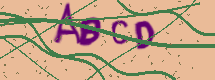

In [8]:
image_generated = random_captcha_text("ABCD")
to_pil_image(image_generated)

In [9]:
image_generated.shape

(80, 215, 3)

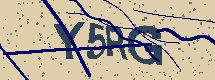

In [10]:
image_origin = load_image("labeled_data/0000.jpg")
to_pil_image(image_origin)

In [11]:
image_origin.shape

(80, 215, 3)

In [12]:
img_list, label_list = load_labeled_data()

In [13]:
def extra_desc_callback(model):
    model.eval()
    pred_list = predict(model, img_list)
    word_acc, char_acc = validate(pred_list, label_list)
    return f"word_acc:{word_acc}, char_acc:{char_acc}"

In [14]:
model = Model(n_classes, input_shape=(3, height, width))

In [15]:
"""
# To use pretrain, uncomment this block of code
model_old_weight = torch.load("ctc_weight3.pth")

cnn_weight = OrderedDict()
for key, weight in model_old_weight.items():
    if key.startswith("cnn."):
        cnn_weight[key] = weight

print(len(model_old_weight), len(cnn_weight))
model.load_state_dict(cnn_weight, strict=False)
""";

In [16]:
model = model.to(device)

In [17]:
extra_desc_callback(model)

'word_acc:0.0, char_acc:0.0'

In [18]:
solve_ctc(model, image_origin)

''

In [19]:
for lr, epochs in [(1e-3, 15), (1e-4, 5), (1e-5, 3)]:
    optimizer = torch.optim.Adam(model.parameters(), lr, amsgrad=True)
    for epoch in range(1, epochs + 1):
        train(model, optimizer, epoch, train_loader)
        valid(model, optimizer, epoch, valid_loader, callback=extra_desc_callback)

Epoch: 1 Loss: 2.8392 Acc: 0.0008 : 100%|██████████| 1000/1000 [02:18<00:00,  7.24it/s]
Test : 1 Loss: 2.9798 Acc: 0.0002 word_acc:0.0, char_acc:0.075: 100%|██████████| 100/100 [00:14<00:00,  6.90it/s]
Epoch: 2 Loss: 0.7762 Acc: 0.3331 : 100%|██████████| 1000/1000 [02:19<00:00,  7.16it/s]
Test : 2 Loss: 0.7770 Acc: 0.3491 word_acc:0.1, char_acc:0.42: 100%|██████████| 100/100 [00:13<00:00,  7.15it/s]
Epoch: 3 Loss: 0.4787 Acc: 0.5354 : 100%|██████████| 1000/1000 [02:20<00:00,  7.14it/s]
Test : 3 Loss: 0.5165 Acc: 0.5030 word_acc:0.06, char_acc:0.415: 100%|██████████| 100/100 [00:14<00:00,  6.88it/s]
Epoch: 4 Loss: 0.3538 Acc: 0.6081 : 100%|██████████| 1000/1000 [02:20<00:00,  7.14it/s]
Test : 4 Loss: 0.3651 Acc: 0.6099 word_acc:0.24, char_acc:0.585: 100%|██████████| 100/100 [00:13<00:00,  7.20it/s]
Epoch: 5 Loss: 0.3039 Acc: 0.6583 : 100%|██████████| 1000/1000 [02:20<00:00,  7.14it/s]
Test : 5 Loss: 0.3681 Acc: 0.6034 word_acc:0.12, char_acc:0.51: 100%|██████████| 100/100 [00:14<00:00, 

In [20]:
torch.save(model.state_dict(), "ctc3w.pth")

In [21]:
extra_desc_callback(model)

'word_acc:0.18, char_acc:0.64'

In [22]:
solve_ctc(model, image_origin)

'y8RG'